### Import packages

In [1]:
import torch
from dataset import Dataset
from learn import train, test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Setup running device

In [2]:
use_gpu = True
device = "cuda" if use_gpu and torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


### Load dataset

In [3]:
features = [
    'v_enc_dim300',
    'v_freq_freq',
    'v_deg',
    'v_sense',
    'e_vertexsim',
    'e_dir', 'e_rel',
    'e_weightsource',
    'e_srank_rel',
    'e_trank_rel',
    'e_sense'
]

split_frac = 0.8
dataset = Dataset(features, split_frac, device)

loading v_enc_dim300
loading v_freq_freq
loading v_deg
loading v_sense
loading e_vertexsim
loading e_dir
loading e_rel
loading e_weightsource
loading e_srank_rel
loading e_trank_rel
loading e_sense
loading problem plain texts
loading labeled pairs


### Setup training and model configurations

In [10]:
feature_enc_len = 52
feature_enc_type = 'proj+mean'  # 'proj+mean' OR 'concat+proj'
path_enc_type = "Attention"  # 'RNN' OR 'LSTM' OR 'Attention'

num_epoch = 400
learning_rate = 0.002
N = 1024  # batch size
num_iter = num_epoch * dataset.train_size//N
print(f"Config: feature_enc_len:{feature_enc_len}, path_enc_type:{path_enc_type}, feature_enc_type:{feature_enc_type}, N:{N}, n_epoch:{num_epoch}, lr:{learning_rate}")

Config: feature_enc_len:52, path_enc_type:Attention, feature_enc_type:proj+mean, N:1024, n_epoch:400, lr:0.002


### Start training

In [11]:
encoder, predictor, loss = train(dataset, feature_enc_len, num_iter, N, learning_rate, device, path_enc_type, feature_enc_type)

defining architecture
Start training
Progress: 0.21%, loss: 6.704515337944031, time spent: 0.03 minutes
Progress: 0.44%, loss: 6.380862176418304, time spent: 0.05 minutes
Progress: 0.68%, loss: 6.269112765789032, time spent: 0.08 minutes
Progress: 0.91%, loss: 6.230764925479889, time spent: 0.10 minutes
Progress: 1.15%, loss: 6.225418150424957, time spent: 0.13 minutes
Progress: 1.38%, loss: 6.216694533824921, time spent: 0.15 minutes
Progress: 1.61%, loss: 6.225397706031799, time spent: 0.17 minutes
Progress: 1.85%, loss: 6.231982409954071, time spent: 0.20 minutes
Progress: 2.08%, loss: 6.213829278945923, time spent: 0.22 minutes
Progress: 2.32%, loss: 6.225829124450684, time spent: 0.25 minutes
Progress: 2.55%, loss: 6.212829530239105, time spent: 0.27 minutes
Progress: 2.79%, loss: 6.219258427619934, time spent: 0.29 minutes
Progress: 3.02%, loss: 6.214401662349701, time spent: 0.32 minutes
Progress: 3.25%, loss: 6.215576946735382, time spent: 0.34 minutes
Progress: 3.49%, loss: 6.

Progress: 28.56%, loss: 5.691417872905731, time spent: 3.10 minutes
Progress: 28.79%, loss: 5.654363632202148, time spent: 3.13 minutes
Progress: 29.03%, loss: 5.687067270278931, time spent: 3.15 minutes
Progress: 29.26%, loss: 5.625301778316498, time spent: 3.18 minutes
Progress: 29.50%, loss: 5.650331497192383, time spent: 3.21 minutes
Progress: 29.73%, loss: 5.722429692745209, time spent: 3.23 minutes
Progress: 29.97%, loss: 5.673110842704773, time spent: 3.26 minutes
Progress: 30.20%, loss: 5.6769691705703735, time spent: 3.29 minutes
Progress: 30.43%, loss: 5.6386606097221375, time spent: 3.31 minutes
Progress: 30.67%, loss: 5.673213958740234, time spent: 3.34 minutes
Progress: 30.90%, loss: 5.660573363304138, time spent: 3.37 minutes
Progress: 31.14%, loss: 5.621033489704132, time spent: 3.39 minutes
Progress: 31.37%, loss: 5.6764636635780334, time spent: 3.42 minutes
Progress: 31.61%, loss: 5.664482474327087, time spent: 3.44 minutes
Progress: 31.84%, loss: 5.6453834772109985, t

Progress: 56.91%, loss: 5.555975437164307, time spent: 6.15 minutes
Progress: 57.15%, loss: 5.521584749221802, time spent: 6.18 minutes
Progress: 57.38%, loss: 5.5516839027404785, time spent: 6.20 minutes
Progress: 57.62%, loss: 5.575553715229034, time spent: 6.22 minutes
Progress: 57.85%, loss: 5.533019781112671, time spent: 6.25 minutes
Progress: 58.08%, loss: 5.5176544189453125, time spent: 6.27 minutes
Progress: 58.32%, loss: 5.537943720817566, time spent: 6.29 minutes
Progress: 58.55%, loss: 5.548094153404236, time spent: 6.32 minutes
Progress: 58.79%, loss: 5.528457343578339, time spent: 6.34 minutes
Progress: 59.02%, loss: 5.540266156196594, time spent: 6.37 minutes
Progress: 59.26%, loss: 5.517783045768738, time spent: 6.39 minutes
Progress: 59.49%, loss: 5.53300416469574, time spent: 6.41 minutes
Progress: 59.72%, loss: 5.539588034152985, time spent: 6.43 minutes
Progress: 59.96%, loss: 5.524841487407684, time spent: 6.46 minutes
Progress: 60.19%, loss: 5.567280292510986, time

Progress: 85.26%, loss: 5.468327224254608, time spent: 9.07 minutes
Progress: 85.50%, loss: 5.4707701206207275, time spent: 9.10 minutes
Progress: 85.73%, loss: 5.485219180583954, time spent: 9.12 minutes
Progress: 85.97%, loss: 5.483734667301178, time spent: 9.15 minutes
Progress: 86.20%, loss: 5.459732532501221, time spent: 9.18 minutes
Progress: 86.44%, loss: 5.474990785121918, time spent: 9.21 minutes
Progress: 86.67%, loss: 5.467093288898468, time spent: 9.24 minutes
Progress: 86.90%, loss: 5.482731521129608, time spent: 9.26 minutes
Progress: 87.14%, loss: 5.449171185493469, time spent: 9.29 minutes
Progress: 87.37%, loss: 5.506433069705963, time spent: 9.31 minutes
Progress: 87.61%, loss: 5.474856436252594, time spent: 9.34 minutes
Progress: 87.84%, loss: 5.460786998271942, time spent: 9.37 minutes
Progress: 88.08%, loss: 5.4707836508750916, time spent: 9.40 minutes
Progress: 88.31%, loss: 5.462345600128174, time spent: 9.43 minutes
Progress: 88.54%, loss: 5.472215950489044, tim

### Test model

In [12]:
config = [feature_enc_len, feature_enc_type, path_enc_type, N, num_epoch]
test(dataset, encoder, predictor, loss, config)

Start testing
Test accuracy: 0.6693777958519723, recall: 0.7066666666666667, precision: 0.6723880597014925, f1: 0.6891013384321224


### Plot training loss VS iteration

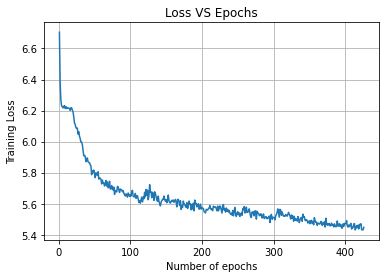

In [13]:
df = pd.read_csv("train.log")
df.epoch += 1
fig, ax = plt.subplots()
ax.plot(df['epoch'], df['loss'])

ax.set(xlabel='Number of epochs', ylabel='Training Loss',
       title='Loss VS Epochs')
ax.grid()
plt.show()

### Error Analysis